In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# using this we can read stocks from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For using time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2013-04-16,15.056071,15.236071,15.020357,15.222857,13.147696,305771200,APPLE
2013-04-17,15.009643,15.021429,14.218214,14.385714,12.424669,945056000,APPLE
2013-04-18,14.463929,14.492500,13.919286,14.001786,12.093080,666299200,APPLE
2013-04-19,13.856071,14.271429,13.753571,13.947500,12.046191,609274400,APPLE
2013-04-22,14.022857,14.364286,13.973929,14.238214,12.297276,429920400,APPLE
...,...,...,...,...,...,...,...
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900,APPLE
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200,APPLE
2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100,APPLE


In [4]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

In [5]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-04-16,NaN,NaN,NaN,NaN
2013-04-17,-0.054992,-0.018139,-0.013625,-0.004833
2013-04-18,-0.026688,-0.029843,-0.021276,-0.001387
2013-04-19,-0.003877,0.003469,0.044339,0.034040
2013-04-22,0.020843,0.012408,0.000300,0.035606


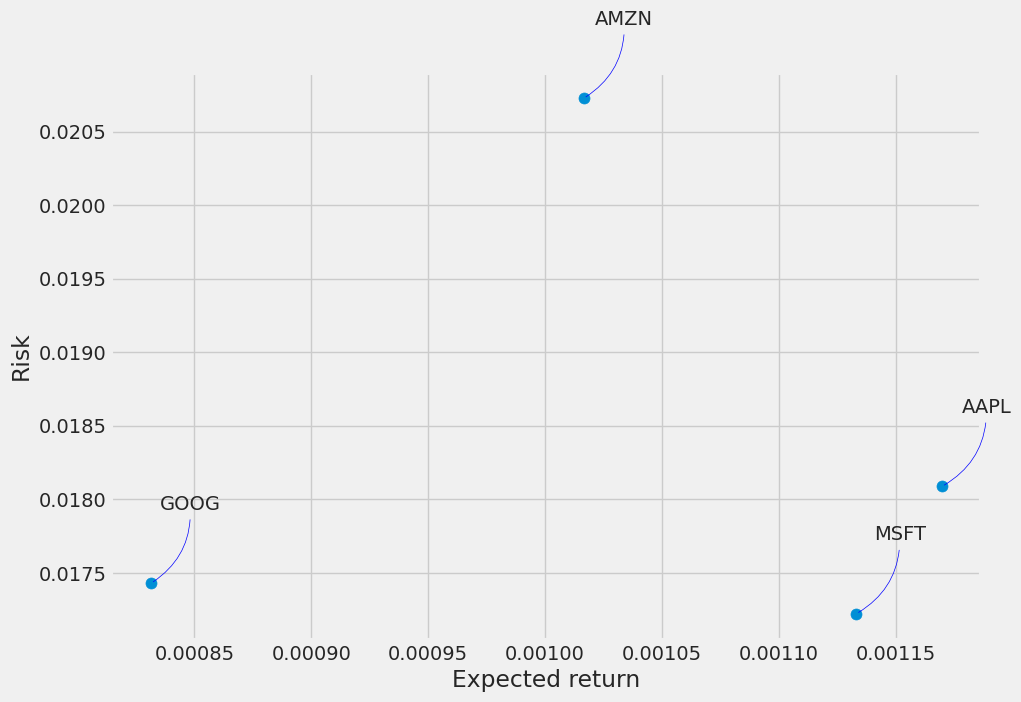

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,xy=(x, y),xytext=(50, 50),textcoords='offset points',ha='right',va='bottom',arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))

In [18]:
df=AAPL

In [19]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2393

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.58858930e-03],
       [2.60744285e-03],
       [3.23010814e-04],
       ...,
       [8.69631898e-01],
       [9.02119762e-01],
       [9.00037258e-01]])

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00758859, 0.00260744, 0.00032301, 0.        , 0.00172979,
       0.0033151 , 0.00317271, 0.00379323, 0.00566753, 0.00841311,
       0.01110343, 0.01036179, 0.01168571, 0.01263348, 0.01491368,
       0.01447803, 0.01557881, 0.01407639, 0.01326887, 0.013645  ,
       0.01133295, 0.00814322, 0.00936088, 0.00908038, 0.01113531,
       0.01044042, 0.01079955, 0.01096743, 0.01160708, 0.01081867,
       0.01156457, 0.01297349, 0.01258036, 0.01279074, 0.0124911 ,
       0.01159858, 0.01018541, 0.01089731, 0.01027679, 0.01000265,
       0.008853  , 0.00965414, 0.00839824, 0.00881262, 0.00876374,
       0.00690007, 0.00559103, 0.00488126, 0.0025522 , 0.00257132,
       0.0016023 , 0.00069064, 0.00127504, 0.00397173, 0.00594166,
       0.00643255, 0.00571428, 0.00521064, 0.00676194, 0.00641767])]
[0.007811717181961109]

[array([0.00758859, 0.00260744, 0.00032301, 0.        , 0.00172979,
       0.0033151 , 0.00317271, 0.00379323, 0.00566753, 0.00841311,
       0.01110343, 0.01036179, 0.0

(2333, 60, 1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 [==============================] - 102s 42ms/step - loss: 0.0014


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 44ms/step


5.1098606018228425

<ipython-input-14-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


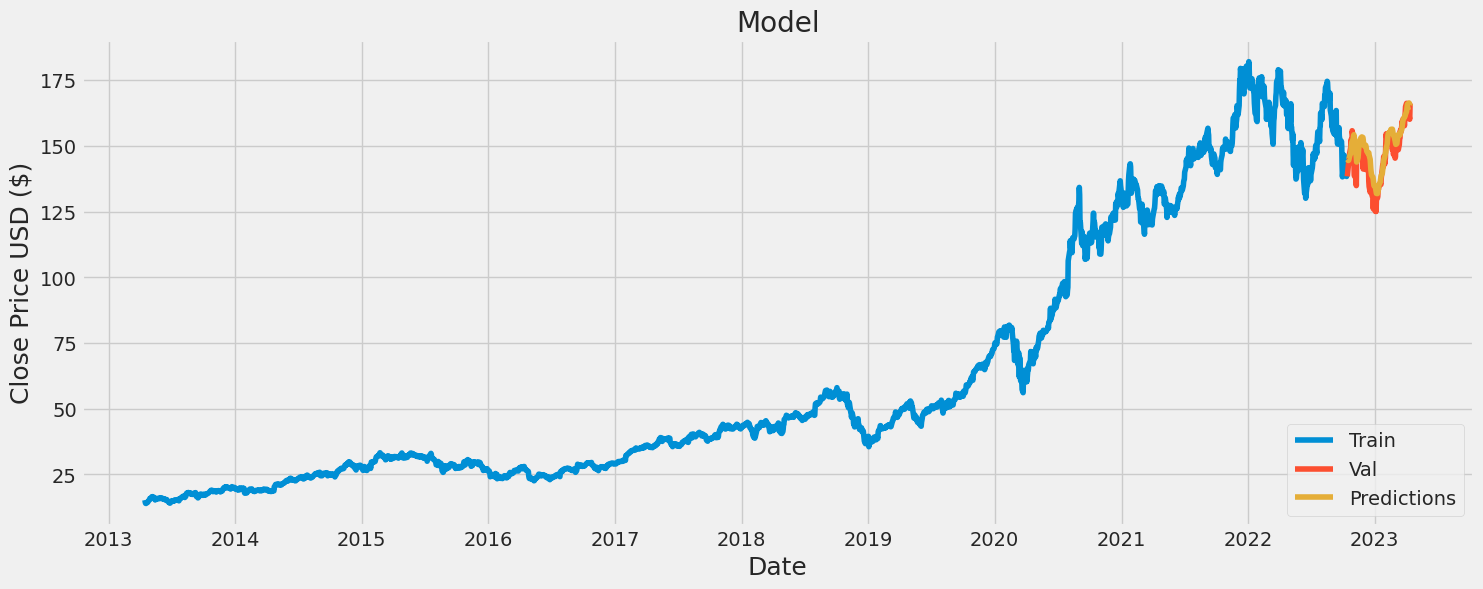

In [14]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [15]:
valid

,Close,Predictions
Date,,
2022-10-14,138.380005,144.891342
2022-10-17,142.410004,144.425995
2022-10-18,143.750000,144.504395
2022-10-19,143.860001,145.003662
2022-10-20,143.389999,145.651108
...,...,...
2023-04-10,162.029999,166.309387
2023-04-11,160.800003,166.145660
2023-04-12,160.100006,165.589966
